In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Loading Data
trainingData = pd.read_csv('C:/Users/manal/OneDrive/Desktop/MBDIO/S2/MachineLearning/Tps/NLP/train.csv')
testData = pd.read_csv('C:/Users/manal/OneDrive/Desktop/MBDIO/S2/MachineLearning/Tps/NLP/test.csv')

In [56]:
trainingData.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [57]:
testData.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


In [3]:
trainingData.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
testData.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


# Afin de nettoyer les données on va fusionner les données d'apprentissage et les données de test 

In [7]:
# Merging both the data sets as tweets in both the data set is unstructured
CombineData = trainingData.append(testData, ignore_index = True, sort = False)
CombineData.head()

C:\Users\manal\AppData\Local\Temp\ipykernel_6996\1025601644.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CombineData = trainingData.append(testData, ignore_index = True, sort = False)


,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [8]:
CombineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


# Nettoyage de donneés :

In [9]:
#Cleaning

#Step 1 : Converting html entities

from html import unescape

# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
CombineData['Cleaned_tweet'] = CombineData['tweet'].apply(lambda x: unescape(x))
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,@user @user welcome here ! i'm it's so #gr...


In [10]:
#Step 2 : Removing "@user" from all the tweets

def rmPattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# remove twitter handles (@user)
CombineData['Cleaned_tweet'] = np.vectorize(rmPattern)(CombineData['Cleaned_tweet'], "@[\w]*")
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [11]:
#Step 3 : Changing all the tweets into lowercase

CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: x.lower())
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [12]:
#Step 4 : Apostrophe Lookup

# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [13]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


In [14]:
#Step 5 : Short Word Lookup

short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [15]:
CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


In [16]:
#Step 6 : Emoticon Lookup

emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [17]:
CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here ! I am it has / it is so #g...


In [18]:
#Step 7 : ReplacingPunctuations with space

CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ð ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


In [19]:
#Step 8 : Replacing Special Characters with space

CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


In [20]:
CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
CombineData.head(10)

,id,label,tweet,Cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love you take with you all the time...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here I am it has it is so g...


In [21]:
#Step 9 : Removing stopwords 
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

CombineData['Cleaned_tweet'] = CombineData['Cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))
CombineData['Cleaned_tweet'][0:5]

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cannot use cause offer whee...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
Name: Cleaned_tweet, dtype: object

In [22]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [24]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.tokenize import word_tokenize

# Creating token for the clean tweets
CombineData['tweet_token'] = CombineData['Cleaned_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
CombineData.head(10)

,id,label,tweet,Cleaned_tweet,tweet_token
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cannot use cause offer whee...,"[thanks, lyft, credit, can, not, use, cause, o..."
2,3,0.0,bihday your majesty,bihday majesty,"[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love take time,"[model, love, take, time]"
4,5,0.0,factsguide: society now #motivation,factsguide society motivation,"[factsguide, society, motivation]"
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...,"[huge, fan, fare, big, talking, leave, chaos, ..."
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]"
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams cannot think schoo...,"[next, school, year, year, exams, can, not, th..."
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...,"[love, land, allin, cavs, champions, cleveland..."
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome I gr,"[welcome, I, gr]"


In [29]:
CombineData.head(10)

,id,label,tweet,Cleaned_tweet,tweet_token,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,"[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cannot use cause offer whee...,"[thanks, lyft, credit, can, not, use, cause, o...",thank lyft credit can not use caus offer wheel...,thanks lyft credit can not use cause offer whe...
2,3,0.0,bihday your majesty,bihday majesty,"[bihday, majesty]",bihday majesti,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,model love take time,"[model, love, take, time]",model love take time,model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society motivation,"[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...,"[huge, fan, fare, big, talking, leave, chaos, ...",huge fan fare big talk leav chao pay disput ge...,huge fan fare big talking leave chaos pay disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]",camp tomorrow danni,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams cannot think schoo...,"[next, school, year, year, exams, can, not, th...",next school year year exam can not think schoo...,next school year year exam can not think schoo...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...,"[love, land, allin, cavs, champions, cleveland...",love land allin cav champion cleveland clevela...,love land allin cavs champion cleveland clevel...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome I gr,"[welcome, I, gr]",welcom i gr,welcome I gr


In [26]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

# Created one more columns tweet_stemmed it shows tweets' stemmed version
CombineData['tweet_stemmed'] = CombineData['tweet_token'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
CombineData['tweet_stemmed'].head(10)

0        father dysfunct selfish drag kid dysfunct run
1    thank lyft credit can not use caus offer wheel...
2                                       bihday majesti
3                                 model love take time
4                              factsguid societi motiv
5    huge fan fare big talk leav chao pay disput ge...
6                                  camp tomorrow danni
7    next school year year exam can not think schoo...
8    love land allin cav champion cleveland clevela...
9                                          welcom i gr
Name: tweet_stemmed, dtype: object

In [27]:
# Importing library for lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
CombineData['tweet_lemmatized'] = CombineData['tweet_token'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
CombineData['tweet_lemmatized'].head(10)

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit can not use cause offer whe...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6                               camping tomorrow danny
7    next school year year exam can not think schoo...
8    love land allin cavs champion cleveland clevel...
9                                         welcome I gr
Name: tweet_lemmatized, dtype: object

In [32]:
pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Text Analysis

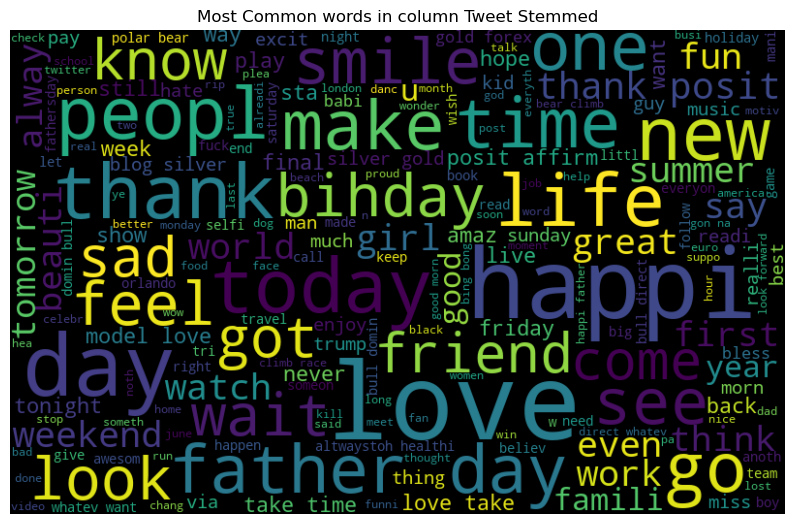

In [33]:


#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in CombineData['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()


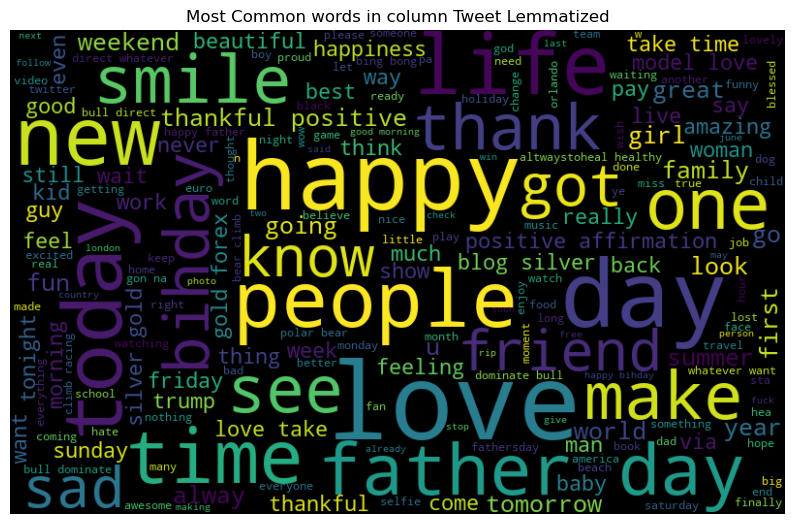

In [35]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in CombineData['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

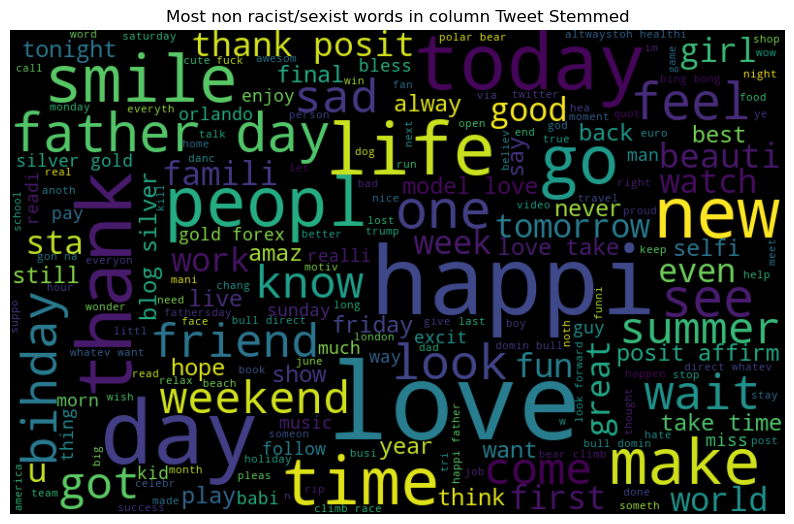

In [36]:
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
normal_words =' '.join([text for text in CombineData['tweet_stemmed'][CombineData['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

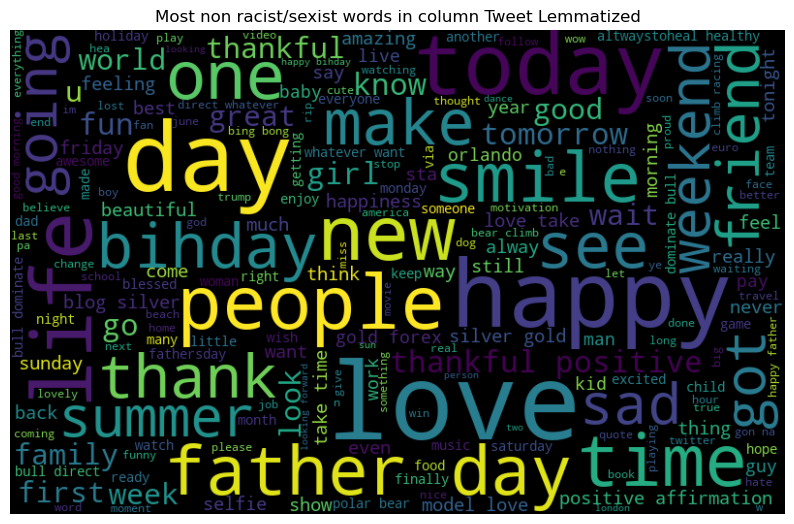

In [37]:
#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in CombineData['tweet_lemmatized'][CombineData['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Lemmatized")
plt.show()

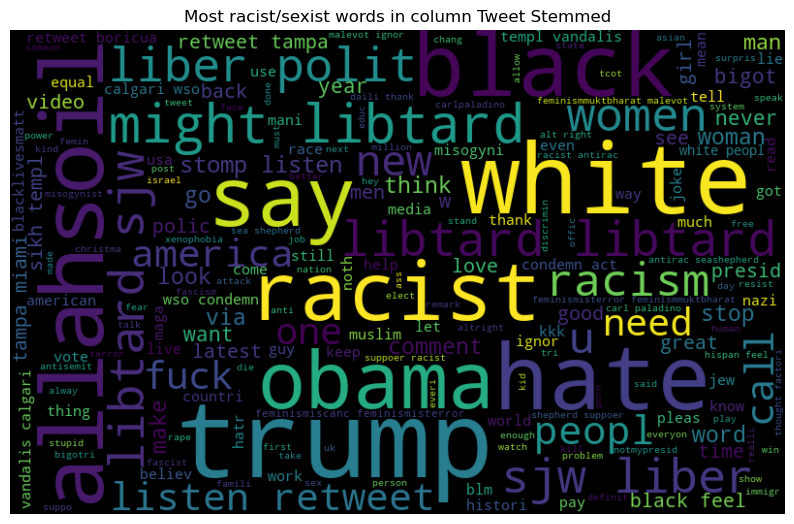

In [38]:
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in CombineData['tweet_stemmed'][CombineData['label'] == 1]])
CombineData
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

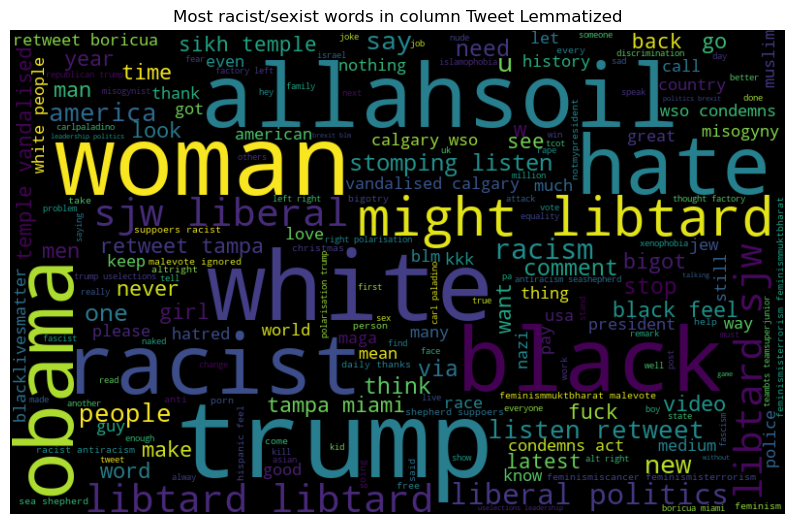

In [39]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in CombineData['tweet_lemmatized'][CombineData['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Lemmatized")
plt.show()

In [40]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [42]:
# bag-of-words feature matrix - For columns "CombineData['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(CombineData['tweet_stemmed'])
bow_stem

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 203386 stored elements in Compressed Sparse Row format>

In [43]:
# bag-of-words feature matrix - For column - CombineData['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(CombineData['tweet_lemmatized'])
bow_lemm

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 187343 stored elements in Compressed Sparse Row format>

In [44]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

In [45]:
# TF-IDF feature matrix - For columns "CombineData['tweet_stemmed']"

tfidf_stem = tfidf_vectorizer.fit_transform(CombineData['tweet_stemmed'])
tfidf_stem

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 203386 stored elements in Compressed Sparse Row format>

In [46]:
# TF-IDF feature matrix - For columns "CombineData['tweet_lemmatized']"

tfidf_lemm = tfidf_vectorizer.fit_transform(CombineData['tweet_lemmatized'])
tfidf_lemm

<49159x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 187343 stored elements in Compressed Sparse Row format>

In [47]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [49]:
# A.1 For columns "CombineData['tweet_stemmed']"
train = bow_stem[:31962,:]
test= bow_stem[31962:,:]

# splitting data into training and validation set
xtrain, xvalid, ytrain, yvalid = train_test_split(train, trainingData['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
# training the model
lreg.fit(xtrain, ytrain) 

prediction = lreg.predict_proba(xvalid) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A1)

0.5550952775476387


In [51]:
# A.2 For columns "CombineData['tweet_lemmatized']"
train = bow_lemm[:31962,:]
test = bow_lemm[31962:,:]

# splitting data into training and validation set
xtrain, xvalid, ytrain, yvalid = train_test_split(train, trainingData['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain, ytrain) # training the model

prediction = lreg.predict_proba(xvalid) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A2 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A2)

0.5372112917023096


In [54]:
# B.1 For columns "combine_df['tweet_stemmed']"
train_tfidf = tfidf_stem[:31962,:]
test_tfidf = tfidf_stem[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(B1)

0.5444933920704845


In [52]:
# B.2 For columns "CombineData['tweet_lemmatized']"
train_tfidf = tfidf_lemm[:31962,:]
test_tfidf = tfidf_lemm[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B2 = f1_score(yvalid, prediction_int) # calculating f1 score
print(B2)

0.5388046387154327


In [55]:
print("F1 - Score Chart")
print("* F1-Score - Model using Bag-of-Words features")
print("   F1-Score = ",A1," - For column tweets are stemmed")
print("   F1-Score = ",A2," - For column tweets are Lemmatized")
print("* F1-Score - Model using TF-IDF features")
print("   F1-Score = ",B1," - For column tweets are stemmed")
print("   F1-Score = ",B2," - For column tweets are Lemmatized")

F1 - Score Chart
* F1-Score - Model using Bag-of-Words features
   F1-Score =  0.5550952775476387  - For column tweets are stemmed
   F1-Score =  0.5372112917023096  - For column tweets are Lemmatized
* F1-Score - Model using TF-IDF features
   F1-Score =  0.5444933920704845  - For column tweets are stemmed
   F1-Score =  0.5388046387154327  - For column tweets are Lemmatized


# Interpretation

    Les scores F1 représentent la performance globale des modèles en termes de précision et de rappel. Donc dans notre cas les résultats obteunus peuvent être divisés en deux catégories : Bag-of-Words (BoW) et TF-IDF.
    Caractéristiques du sac de mots :
    * Pour les tweets stemmé, le score F1 est de 0,5551, cela indique que le modèle utilise des tweets tronqués et la représentation BoW a atteint un niveau de performance modéré.
    * Pour les tweets lemmatisés, le score F1 est de 0,5372, ce qui suggère que le modèle utilise des tweets lemmatisés et la représentation BoW a atteint une performance légèrement inférieure à celle des tweets stemmé.
    Caractéristiques TF-IDF :
    * Pour les tweets stemmé, le score F1 est de 0,5445. Donc, on peut dire le modèle utilise des tweets tronqués et la représentation TF-IDF a atteint une performance similaire à la représentation BoW.
    * Pour les tweets lemmatisés, le score F1 est de 0,5388. Alors ce modèle utilise des tweets lemmatisés et la représentation TF-IDF a atteint une performance légèrement inférieure à celle du modèle utilisant des tweets extraits et la représentation TF-IDF.
    
    Dans l'ensemble, les résultats indiquent que les modèles utilise des tweets tronqués et des représentations BoW/TF-IDF ont tendance à être légèrement plus performants que les modèles qui utilise des tweets lemmatisés. Cependant, les différences de performance ne sont pas substantielles. Autrement dit, les modèles utilisant la représentation Bag-of-Words semblent avoir des performances légèrement meilleures que ceux utilisant TF-IDF, mais les différences sont minimes. De plus, le stemming semble donner de légères améliorations par rapport à la lemmatisation, bien que cela puisse varier en fonction du jeu de données spécifique et du problème de classification des sentiments des tweets.